In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
gender_dict = {'Male' : 1 , 'Female' : 2}

In [6]:
df['Gender'] = df['Gender'].map(gender_dict)

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [9]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,1.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,1.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,1.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,2.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,2.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,2.000000,60.000000,150000.000000,1.000000


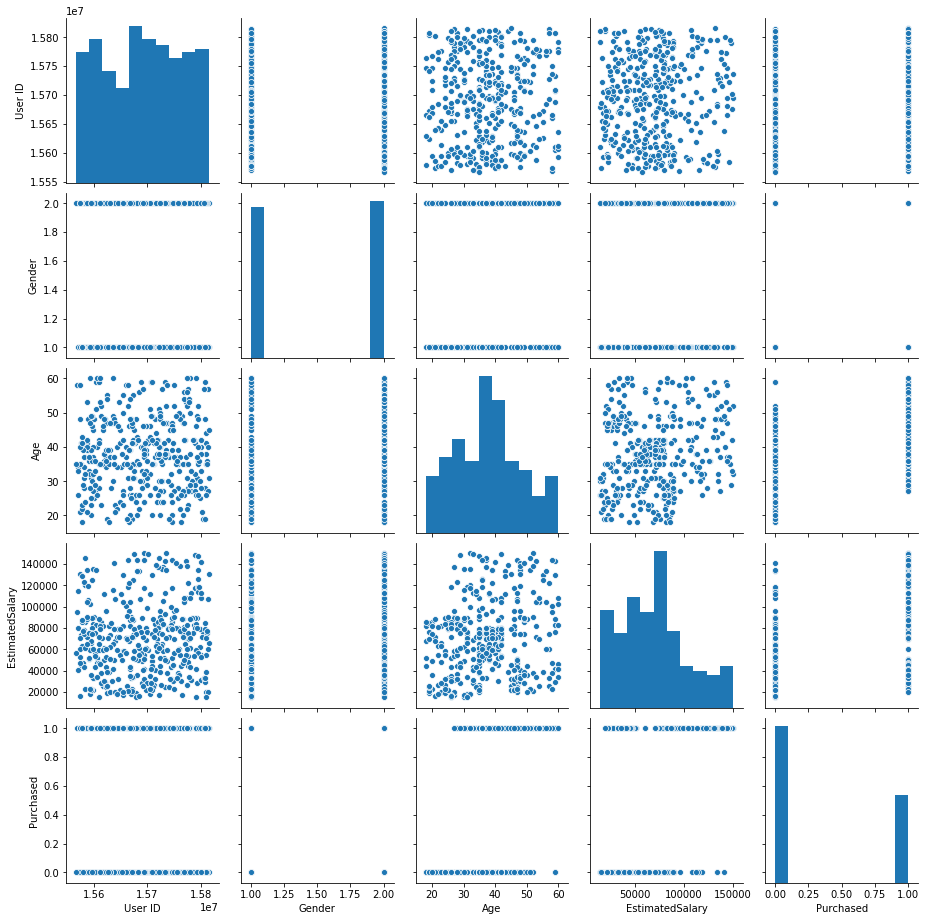

In [16]:
sns.pairplot(df)

In [17]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [23]:
x = df[['Gender', 'Age', 'EstimatedSalary']]
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,2,26,43000
3,2,27,57000
4,1,19,76000
...,...,...,...
395,2,46,41000
396,1,51,23000
397,2,50,20000
398,1,36,33000


In [27]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [37]:
y_train.value_counts()

0    192
1    108
Name: Purchased, dtype: int64

In [39]:
x_train

,Gender,Age,EstimatedSalary
169,2,29,47000
253,2,37,146000
51,2,18,44000
42,1,35,108000
198,1,26,80000
...,...,...,...
0,1,19,19000
323,2,48,30000
242,2,50,88000
308,1,36,125000


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 1.03390789, -0.77783385, -0.64529167],
       [ 1.03390789, -0.02871618,  2.29595489],
       [ 1.03390789, -1.80787065, -0.73442035],
       [-0.96720415, -0.2159956 ,  1.16699157],
       [-0.96720415, -1.05875298,  0.33512385],
       [-0.96720415, -1.52695152,  0.09744736],
       [-0.96720415, -0.96511327,  0.6025099 ],
       [-0.96720415, -0.2159956 , -0.22935781],
       [-0.96720415, -0.96511327,  0.57280034],
       [-0.96720415,  0.34584266,  0.54309078],
       [ 1.03390789,  0.43948237,  0.03802824],
       [ 1.03390789, -0.02871618,  0.72134815],
       [ 1.03390789, -0.59055443,  0.0677378 ],
       [ 1.03390789, -0.2159956 , -0.55616299],
       [ 1.03390789, -1.05875298,  0.4539621 ],
       [ 1.03390789, -0.68419414, -0.19964825],
       [-0.96720415, -0.77783385, -0.76412992],
       [-0.96720415, -0.02871618,  0.03802824],
       [-0.96720415,  0.43948237,  1.04815332],
       [-0.96720415, -0.2159956 , -1.3880307 ],
       [ 1.03390789, -1.05875298, -1.001

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

In [42]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [43]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.85
Testing Accuracy :0.86
Confusion matrix:
 [[57  8]
 [ 6 29]]
Recall: 0.8285714285714286
precision: 0.7837837837837838
F1-score: 0.8055555555555555
Fbeta-score: 0.7923497267759563
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        65
           1       0.78      0.83      0.81        35

    accuracy                           0.86       100
   macro avg       0.84      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100

---------------------------------
using KNN: 
Training Accuracy :0.93
Testing Accuracy :0.89
Confusion matrix:
 [[57  8]
 [ 3 32]]
Recall: 0.9142857142857143
precision: 0.8
F1-score: 0.8533333333333333
Fbeta-score: 0.8205128205128205
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        65
           1       0.80      0.91      0.85        35

    accuracy                           0.89       100
   macr

C:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Training Accuracy :0.9933333333333333
Testing Accuracy :0.91
Confusion matrix:
 [[59  6]
 [ 3 32]]
Recall: 0.9142857142857143
precision: 0.8421052631578947
F1-score: 0.8767123287671234
Fbeta-score: 0.855614973262032
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        65
           1       0.84      0.91      0.88        35

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

---------------------------------
using RF: 
Training Accuracy :0.9966666666666667
Testing Accuracy :0.91
Confusion matrix:
 [[58  7]
 [ 2 33]]
Recall: 0.9428571428571428
precision: 0.825
F1-score: 0.88
Fbeta-score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.82      0.94      0.88        35

    accuracy                           0.91       100
   

## XGBClassifier is the most appropriate algorithm

In [45]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)
y_train.value_counts()

AttributeError: 'SMOTE' object has no attribute '_validate_data'